Numerical Solutions to ODEs, Part I (Euler's Method)
==========================================

Christopher Tripp | March 2018

Simple Harmonic Oscillation of a Spring
----------------------------
Consider an ideal horizontal spring with a mass $m$ attached to its free end, where the displacement $x$ of the mass from its equilibrium position varies with time $t$.  We know from classical mechanics that the force on the mass is proportional to the displacement of the mass from equilibrium:
$$F = m\frac{d^2x}{dt^2} = -kx$$
where $k$ is the spring constant.  For simplicity, let's set $k/m = 1$, so that we have
$$\frac{d^2x}{dt^2} = -x$$
(Note that there is no loss of generality here, since we can always do the same thing by an appropriate choice of units.)

Now, although this is a second-order differential equation, we can express it as two coupled first-order differential equations:
$$\frac{dx}{dt} = v$$
and
$$\frac{dv}{dt} = -x$$

The Explicit (Forward) Euler Method
---------------------------
Now, for a function $f(a)$, we can approximate its derivative as follows:
$$\frac{df(r)}{dr} \approx \frac{f(r + h) - f(r)}{h}$$

We can rearrange this to obtain the following equation:
$$f(r+h) \approx f(r) + h \frac{df(r)}{dr}$$

We can apply this equation to the problem of simple harmonic oscillation; if we say that $h$ is the step size, then we have $t_n = t_0 + nh$, which we can express recursively as
$$t_{n+1} = t_n + h$$

From our earlier re-arranged difference equation we therefore have
\begin{align*}
x_{n+1} &= x(t_{n+1}) \\
&\approx x(t_n) + h\frac{dx(t_n)}{dt}\\
&= x(t_n) + hv(t_n)\\
&= x_n + hv_n \\
\end{align*}


Similarly we see that
\begin{align*}
v_{n+1} &= v(t_{n+1}) \\
&\approx v(t_n) + h\frac{dv(t_n)}{dt} \\
&= v(t_n) + h[-x(t_n)] \\
&= v_n - hx_n
\end{align*}
(Note that the third line is obtained by making use one of the two coupled first-order differential equations that we noted earlier for our harmonic oscillator system, namely $dv/dt = -x$.)

With these equations in hand, if we assume that we are given initial conditions $x_0$ and $v_0$ (and we set initial time $t_0 = 0$), then we can numerically solve for the motion of the mass on the spring.

In [1]:
#python 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define the step
h = 1e-4

#initial values
t0 = 0
x0 = 2.9
v0 = 1.35

#define the extent of the time interval we shall plot
tf = 20

#create and initialize time array
t = np.arange(t0, tf, h)
t[0] = t0

#create and initialize position array
x = np.zeros(len(t))
x[0] = x0

#create and initialize velocity array
v = np.zeros(len(t))
v[0] = v0

#calculate the rest of the position and velocity values
for n in np.arange(0, len(t)-1, 1):
    x[n+1] = x[n] + (h*v[n])
    v[n+1] = v[n] - (h*x[n])

Comparing Numerical and Analytic Solutions
-----------------
Let us note that the analytic solutions for this system are $x(t) = A\cos(t + \phi)$ and $v(t) = -A\sin(t + \phi)$.  If we use the given initial conditions we can solve for $A$ and $\phi$, and we thus obtain the solutions
$$x(t) = \frac{x_0}{\cos \left ( \arctan \left ( \frac{-v_0}{x_0} \right ) \right )}\cos \left ( t + \arctan \left ( \frac{-v_0}{x_0} \right ) \right )$$
$$v(t) = -\frac{x_0}{\cos \left ( \arctan \left ( \frac{-v_0}{x_0} \right ) \right )}\sin \left ( t + \arctan \left ( \frac{-v_0}{x_0} \right ) \right )$$

Let's plot these analytic solutions in the same graphs as the numerical solutions we are obtaining via Euler's Method.

In [4]:
#analytic position solutions
x_analytic = np.zeros(len(t))
x_analytic[0] = x0

for n in np.arange(1, len(t), 1):
    x_analytic[n] = (x0/np.cos(np.arctan(-v0/x0)))*np.cos(t[n] + np.arctan(-v0/x0))

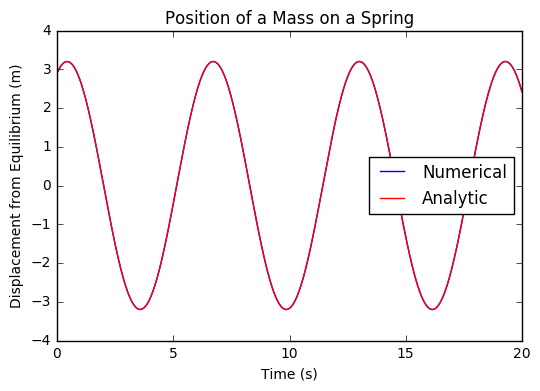

In [5]:
#make the position plot
plt.plot(t, x, 'b-', label="Numerical")
plt.plot(t, x_analytic, 'r-', label="Analytic")
plt.xlabel("Time (s)")
plt.ylabel("Displacement from Equilibrium (m)")
plt.legend(loc=0)
plt.title("Position of a Mass on a Spring")
plt.show()

In [6]:
#analytic velocity solutions
v_analytic = np.zeros(len(t))
v_analytic[0] = v0

for n in np.arange(1, len(t), 1):
    v_analytic[n] = -(x0/np.cos(np.arctan(-v0/x0)))*np.sin(t[n] + np.arctan(-v0/x0))

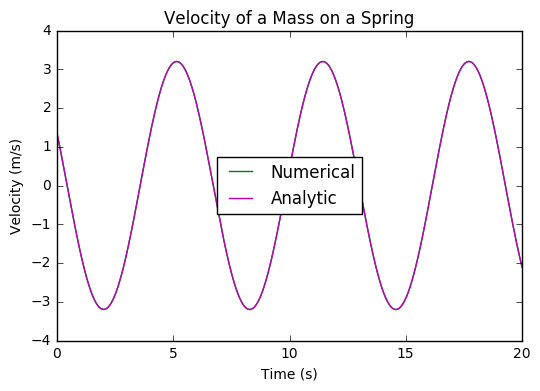

In [7]:
#make the velocity plot
plt.plot(t, v, 'g-', label="Numerical")
plt.plot(t, v_analytic, 'm-', label="Analytic")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend(loc=0)
plt.title("Velocity of a Mass on a Spring")
plt.show()


Jim says : as we see from the graphs with a step of h=0.0001, the numeric and analytic results look the same on the plots.

Chris says: with a step size of h=0.1, the explicit Euler method as we implemented has a significant error which increases with time.  This is likely to have resulted from the fact that our Euler method equations were derived from an approximation of the definition of a derivative, which is supposed to take the limit as $h \to 0$, but we instead used a very small (but non-zero) value for $h$.  An error like this resulting from replacing a definition in terms of limits with a finite representation is known as a **truncation error**.

Error Analysis
-----

Let's study the actual error by plotting it , namely looking at $x_{\text{analytic}}(t_n) - x_{\text{numerical}}(t_n)$ and $v_{\text{analytic}}(t_n) - v_{\text{numerical}}(t_n)$.

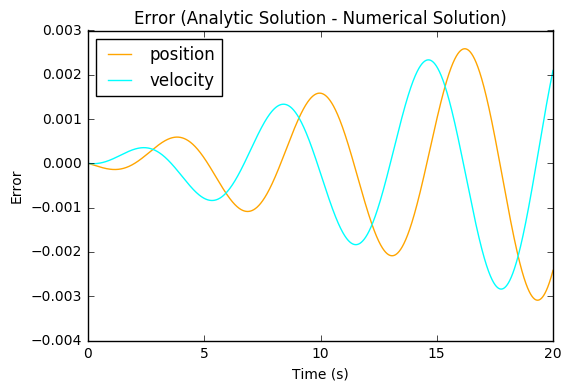

In [8]:
#make the error plot for position and velocity
plt.plot(t, (x_analytic - x), 'orange', label="position")
plt.plot(t, (v_analytic - v), 'cyan', label="velocity")
plt.xlabel("Time (s)")
plt.ylabel("Error")
plt.legend(loc=0)
plt.title("Error (Analytic Solution - Numerical Solution)")
plt.show()

Now, let's see what happens when we plot the maximum value of the positional error for some different values of $h$.

In [13]:
#create and initialize the array of 'h' values that we want to look at.
#let's look at h=h0, h0/2, h0/4, ... , h0/256
h0 = 2
vals_count = 16
h_vals = np.zeros(vals_count)
h_vals[0] = h0
for i in np.arange(1, vals_count, 1):
    h_vals[i] = (h_vals[i-1])/2.0

#create an array to hold the max position error for each value of 'h'
error_vals = np.zeros(len(h_vals))

#calculate the max position error for each value of 'h'
for the_h in np.arange(0, len(h_vals), 1):
    
    #create and initialize time array for the given value of 'h'
    t_for_given_h = np.arange(t0, tf, h_vals[the_h])
    t_for_given_h[0] = t0
        
    #create and initialize numerical position array for the given value of 'h'
    x_num = np.zeros(len(t_for_given_h))
    x_num[0] = x0
    
    #create and initialize numerical velocity array (we need this to calculate the 
    #numerical position vals) for the given value of 'h'
    v_num = np.zeros(len(t_for_given_h))
    v_num[0] = v0
    
    #create and initialize analytic position array for the given value of 'h'
    x_ana = np.zeros(len(t_for_given_h))
    x_ana[0] = x0
    
    #calculate the numerical and analytic position values for the given value of 'h'
    for the_t in np.arange(0, len(t_for_given_h)-1, 1):
        x_num[the_t+1] = x_num[the_t] + (h_vals[the_h]*v_num[the_t])  #numerical position
        v_num[the_t+1] = v_num[the_t] - (h_vals[the_h]*x_num[the_t])  #numerical velocity
        x_ana[the_t+1] = (x0/np.cos(np.arctan(-v0/x0)))*np.cos(t_for_given_h[the_t+1] + np.arctan(-v0/x0))  #analytic position
    
    #calculate the maximum error (x_analytic - x_numerical) for the given value of 'h'
    error_vals[the_h] = np.amax(x_ana - x_num)

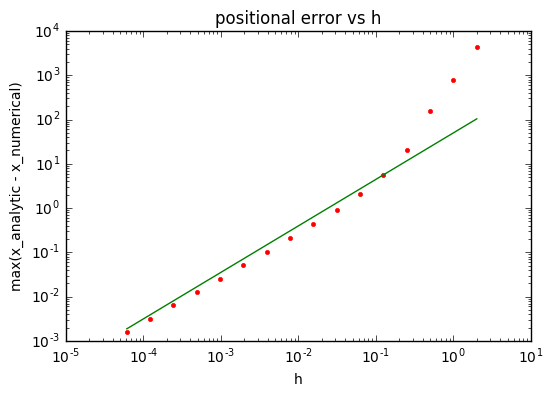

In [28]:
#plot the positional error as a function of 'h'
plt.loglog(h_vals, error_vals, 'r.')
plt.loglog(h_vals, 50 * h_vals ** 1.05, 'g')
plt.xlabel("h")
plt.ylabel("max(x_analytic - x_numerical)")
plt.title("positional error vs h")
plt.show()


Jim says : From the log-log plot we can see that the relation between h and the error is very close to linear (the green line is $ \text{error} \propto h^{1.05}$) for a range of h values from $10^{-4}$ to $10^{-1}$.

    Chris, the graph that you made didn't really show what you said in a convincing way.

----

Chris said : We see from this graph that the error in our implementation of the explicit Euler method is proportional to the value of the "step" $h$ chosen.  This would seem to confirm that the error we saw in our original graphs is indeed a truncation error (as opposed to a roundoff error, or something else).  

Analyzing Energy
-------------
Mechanical energy should be conserved in this system.  Let's calculate the (normalized) total mechanical energy $E = x^2 + v^2$ first based on our numerical solutions for position and velocity, and then based on the analytic solutions for position and velocity, and then plot each as a function of time.

In [29]:
#create numerical energy array
energy_vals_num = np.zeros(len(t))
energy_vals_num[0] = x0**2 + v0**2

#fill numerical energy array
for i in np.arange(1, len(t), 1):
    energy_vals_num[i] = x[i]**2 + v[i]**2
    
#create analytic energy array
energy_vals_ana = np.zeros(len(t))
energy_vals_ana[0] = x0**2 + v0**2

#fill analytic energy array
for i in np.arange(1, len(t), 1):
    energy_vals_ana[i] = x_analytic[i]**2 + v_analytic[i]**2

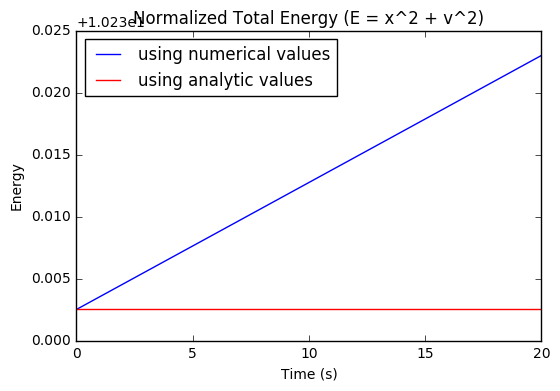

In [30]:
#plot the numerical and analytic energies
plt.plot(t, energy_vals_num, 'blue', label="using numerical values")
plt.plot(t, energy_vals_ana, 'red', label="using analytic values")
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.title("Normalized Total Energy (E = x^2 + v^2)")
plt.legend(loc=0)
plt.show()

We note that the energy calculated with analytic solutions reflects what we expected given that energy is conserved.  The energy calculated with numerical solutions, on the other hand, seems to increase without bound as time increases, which is clearly not an accurate representation of our system.  We also note that the trend of the energy calculated with numerical solutions is reminiscent of our earlier plot of error values insofar as they both increase with time.  